In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data

In [4]:
Y = iris.target

In [5]:
print "X = "
for i in range(5):
    print X[i,:]

X = 
[ 5.1  3.5  1.4  0.2]
[ 4.9  3.   1.4  0.2]
[ 4.7  3.2  1.3  0.2]
[ 4.6  3.1  1.5  0.2]
[ 5.   3.6  1.4  0.2]


In [6]:
import sys
target_names = iris.target_names
feature_names = iris.feature_names
ncol = len(X[0])
nrow = len(X)

for i in range(ncol):
    sys.stdout.write(feature_names[i])
    sys.stdout.write(", ")
sys.stdout.write("target \n")

for i in range(nrow):
    for j in range(ncol+1):
        if(j<ncol):
            sys.stdout.write(str(X[i,j]))
            sys.stdout.write(", ")
        else:
            print(target_names[Y[i]])

sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target 
5.1, 3.5, 1.4, 0.2, setosa
4.9, 3.0, 1.4, 0.2, setosa
4.7, 3.2, 1.3, 0.2, setosa
4.6, 3.1, 1.5, 0.2, setosa
5.0, 3.6, 1.4, 0.2, setosa
5.4, 3.9, 1.7, 0.4, setosa
4.6, 3.4, 1.4, 0.3, setosa
5.0, 3.4, 1.5, 0.2, setosa
4.4, 2.9, 1.4, 0.2, setosa
4.9, 3.1, 1.5, 0.1, setosa
5.4, 3.7, 1.5, 0.2, setosa
4.8, 3.4, 1.6, 0.2, setosa
4.8, 3.0, 1.4, 0.1, setosa
4.3, 3.0, 1.1, 0.1, setosa
5.8, 4.0, 1.2, 0.2, setosa
5.7, 4.4, 1.5, 0.4, setosa
5.4, 3.9, 1.3, 0.4, setosa
5.1, 3.5, 1.4, 0.3, setosa
5.7, 3.8, 1.7, 0.3, setosa
5.1, 3.8, 1.5, 0.3, setosa
5.4, 3.4, 1.7, 0.2, setosa
5.1, 3.7, 1.5, 0.4, setosa
4.6, 3.6, 1.0, 0.2, setosa
5.1, 3.3, 1.7, 0.5, setosa
4.8, 3.4, 1.9, 0.2, setosa
5.0, 3.0, 1.6, 0.2, setosa
5.0, 3.4, 1.6, 0.4, setosa
5.2, 3.5, 1.5, 0.2, setosa
5.2, 3.4, 1.4, 0.2, setosa
4.7, 3.2, 1.6, 0.2, setosa
4.8, 3.1, 1.6, 0.2, setosa
5.4, 3.4, 1.5, 0.4, setosa
5.2, 4.1, 1.5, 0.1, setosa
5.5, 4.2, 1.4, 0.2, setosa


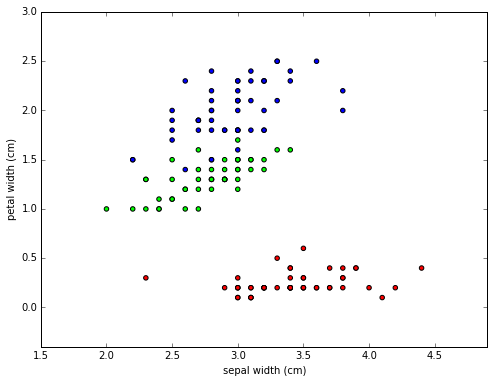

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
"""
col_id
0: sepal length (cm)
1: sepal width (cm)
2: petal length (cm)
3: petal width (cm)
"""

x_col_id = 1
y_col_id = 3
x_min, x_max = X[:, x_col_id].min() - .5, X[:,  x_col_id].max() + .5
y_min, y_max = X[:, y_col_id].min() - .5, X[:,  y_col_id].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()



# データ点をプロット
#色はsetosa:赤、versicolor:青、virginica:緑
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, x_col_id], X[:, y_col_id], c=Y, cmap=cmap_bold)
plt.xlabel(feature_names[x_col_id])
plt.ylabel(feature_names[y_col_id])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [14]:
logit.predict_proba([5.1, 3.5, 1.4, 0.2])

array([[  8.79681649e-01,   1.20307538e-01,   1.08131372e-05]])

In [15]:
logit.predict_proba([5.0, 2.0, 5.0, 2.0])

array([[  1.99566458e-04,   3.44639307e-01,   6.55161126e-01]])

In [18]:
logit.predict_proba([1.0, 2.0, 0.0, 2.0])

array([[ 0.73022772,  0.01002073,  0.25975155]])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(k)
knn.fit(X, Y)
print knn.predict_proba([5.1, 3.5, 1.4, 0.2])

[[ 1.  0.  0.]]


In [23]:
print knn.predict_proba([5.0, 2.0, 5.0, 2.0])

[[ 0.  0.  1.]]


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
cv = 10
logit = LogisticRegression()
scores = cross_validation.cross_val_score(logit, X, Y, cv = cv)
print sum(scores)/cv

0.953333333333


In [26]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(k)
cv = 10
scores = cross_validation.cross_val_score(knn, X, Y, cv = cv)
print sum(scores)/cv

0.966666666667


score = 0.96


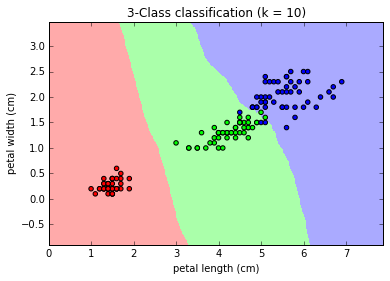

In [59]:
import numpy as np
k = 10
x_col_id = 2
y_col_id = 3

"""
col_id
0: sepal length (cm)
1: sepal width (cm)
2: petal length (cm)
3: petal width (cm)
"""

#Cross Validationによる性能評価
sub_X = np.array([[i[x_col_id],i[y_col_id]] for i in X])
knn = KNeighborsClassifier(k)
scores = cross_validation.cross_val_score(knn,sub_X,Y,cv=cv)
print("score = " + str(sum(scores)/cv))

#ここから下はグラフ用
clf = KNeighborsClassifier(k)
clf.fit(sub_X, Y)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02  
x_min, x_max = sub_X[:, 0].min() - 1, sub_X[:, 0].max() + 1
y_min, y_max = sub_X[:, 1].min() - 1, sub_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(sub_X[:, 0], sub_X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (k))
plt.xlabel(feature_names[x_col_id])
plt.ylabel(feature_names[y_col_id])

plt.show()